In [1]:
pip install bing_image_downloader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from bing_image_downloader import downloader
import os
import warnings
warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
query = "vulture"
output_dir = "images"
limit = 100 
downloader.download(query,limit=limit,output_dir=output_dir,adult_filter_off=True,force_replace=False,verbose=False,)

[%] Downloading Images to /kaggle/working/images/vulture
[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Eagle_beak_sideview_A.jpg/1200px-Eagle_beak_sideview_A.jpg
[!] Error:: HTTP Error 404: Not Found
[Error]Invalid image, not saving https://cdn.britannica.com/02/162502-050-FEEA94DE/Vulture.jpg

[!] Issue getting: https://cdn.britannica.com/02/162502-050-FEEA94DE/Vulture.jpg
[!] Error:: Invalid image, not saving https://cdn.britannica.com/02/162502-050-FEEA94DE/Vulture.jpg

[!] Issue getting: http://animalia-life.com/data_images/vulture/vulture1.jpg
[!] Error:: HTTP Error 404: Not Found
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Cathartes_aura_-Santa_Teresa_County_Park%2C_San_Jose%2C_California%2C_USA_-adult-8a.jpg/1200px-Cathartes_aura_-Santa_Teresa_County_Park%2C_San_Jose%2C_California%2C_USA_-adult-8a.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Cathartes_aura_-Santa_Te

In [4]:
query = "owl"
output_dir = "images"
limit = 100 
downloader.download( query,limit=limit,output_dir=output_dir,adult_filter_off=True,force_replace=False,verbose=False,)

[%] Downloading Images to /kaggle/working/images/owl
[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/c/c6/Tyto_alba_-British_Wildlife_Centre,_Surrey,_England-8a_(1).jpg
[!] Error:: HTTP Error 404: Not Found
[Error]Invalid image, not saving https://www.worldatlas.com/r/w1200/upload/b3/19/27/great-horned-owl.jpg

[!] Issue getting: https://www.worldatlas.com/r/w1200/upload/b3/19/27/great-horned-owl.jpg
[!] Error:: Invalid image, not saving https://www.worldatlas.com/r/w1200/upload/b3/19/27/great-horned-owl.jpg

[Error]Invalid image, not saving https://mdc.mo.gov/sites/default/files/mo_nature/media/images/2013/11/great_horned_owl_closeup_11-19-13.jpg

[!] Issue getting: https://mdc.mo.gov/sites/default/files/mo_nature/media/images/2013/11/great_horned_owl_closeup_11-19-13.jpg
[!] Error:: Invalid image, not saving https://mdc.mo.gov/sites/default/files/mo_nature/media/images/2013/11/great_horned_owl_closeup_11-19-13.jpg

[Error]Invalid image, not saving http://www.conserv

In [5]:
import os

def rename_files(folder_path, new_name_base):
    files = os.listdir(folder_path)
    for i, filename in enumerate(files, start=1):
        file_extension = os.path.splitext(filename)[1]  
        new_name = f"{new_name_base}_{i}{file_extension}"
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_name)
        os.rename(old_path, new_path)
        
rename_files("/kaggle/working/images/owl", "owl")
rename_files("/kaggle/working/images/vulture", "vulture")

In [6]:
from PIL import Image
import os

folders = ["/kaggle/working/images/vulture", "/kaggle/working/images/owl"]

supported_formats = (".png", ".bmp", ".tiff", ".jpeg", ".webp", ".gif")

for folder_path in folders:
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(supported_formats):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert("RGB")
            new_filename = os.path.splitext(filename)[0] + ".jpg"
            img.save(os.path.join(folder_path, new_filename), "JPEG")
            os.remove(img_path) 


In [7]:
from os import makedirs
from os import listdir
import shutil
import random
def create_train_test_split(vulture_dir, owl_dir, output_dir, train_ratio=0.8):
    os.makedirs(os.path.join(output_dir, 'train', 'vulture'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'train', 'owl'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', 'vulture'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', 'owl'), exist_ok=True)
    vulture_images = os.listdir(vulture_dir)
    owl_images = os.listdir(owl_dir)

    random.shuffle(vulture_images)
    random.shuffle(owl_images)

    num_train_vulture = int(len(vulture_images) * train_ratio)
    num_train_owl = int(len(owl_images) * train_ratio)

    train_vulture = vulture_images[:num_train_vulture]
    test_vulture = vulture_images[num_train_vulture:]

    train_owl = owl_images[:num_train_owl]
    test_owl = owl_images[num_train_owl:]

    for img in train_vulture:
        shutil.copy(os.path.join(vulture_dir, img), os.path.join(output_dir, 'train', 'vulture', img))
    for img in test_vulture:
        shutil.copy(os.path.join(vulture_dir, img), os.path.join(output_dir, 'test', 'vulture', img))

    for img in train_owl:
        shutil.copy(os.path.join(owl_dir, img), os.path.join(output_dir, 'train', 'owl', img))
    for img in test_owl:
        shutil.copy(os.path.join(owl_dir, img), os.path.join(output_dir, 'test', 'owl', img))

    print("Dataset split completed.")


In [8]:
vulture_dir = "/kaggle/working/images/vulture"
owl_dir = "/kaggle/working/images/owl"
output_dir = '/kaggle/working/dataset_vultures_vs_owls'

create_train_test_split(vulture_dir, owl_dir, output_dir)

Dataset split completed.


In [9]:
from matplotlib import pyplot
from matplotlib.image import imread


def plot_images(folder, animal_name):


    files = os.listdir(folder)  # List all files in the folder
    i = 0
    for file_name in files[:9]:  # Limiting to the first 9 images
        # Set the main title for all images
        pyplot.suptitle(animal_name)
        # Define subplot
        pyplot.subplot(330 + 1 + i)
        # Read and plot the image
        image = imread(os.path.join(folder, file_name))
        pyplot.imshow(image)
        i += 1  # Increment index for next subplot
    # Display the images
    pyplot.subplots_adjust(wspace=0.4, hspace=0.4)
    
    pyplot.show()

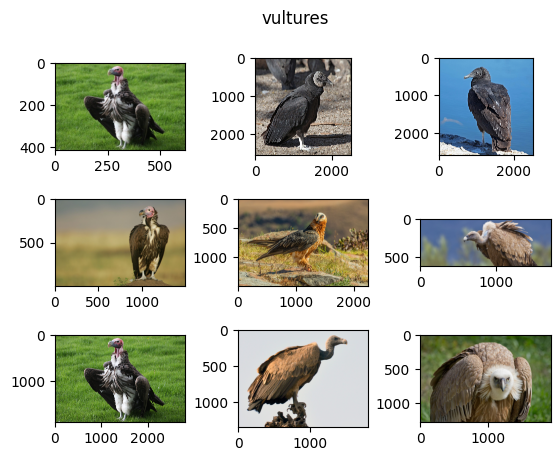

In [10]:
plot_images("/kaggle/working/dataset_vultures_vs_owls/train/vulture", "vultures")

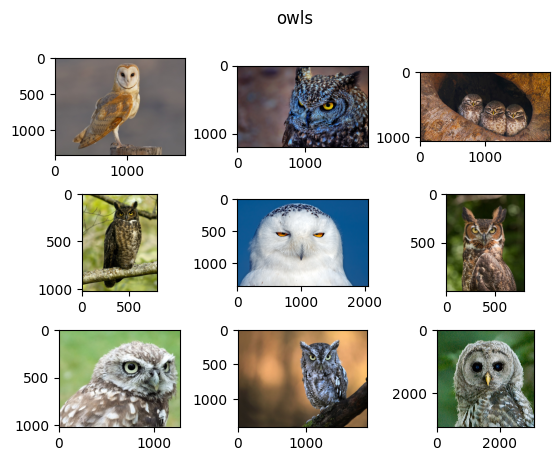

In [11]:
plot_images("/kaggle/working/dataset_vultures_vs_owls/train/owl", "owls")

In [12]:
import os
print(os.environ.get("CUDA_VISIBLE_DEVICES"))


-1


In [13]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Enable GPU 0


In [14]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

-1


In [15]:
import tensorflow as tf  

if tf.test.gpu_device_name():
    print("GPU is available")
else:
    print("GPU is not available. Switching to CPU.")

GPU is not available. Switching to CPU.


2024-11-16 11:27:55.877570: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [16]:
import sys
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from tensorflow.keras.backend import clear_session
from tqdm.keras import TqdmCallback
from time import time
import shutil
import numpy as np
import pandas as pd
import os




class BatchLoggingCallback(tf.keras.callbacks.Callback):
    def __init__(self, log_dir):
        super(BatchLoggingCallback, self).__init__()
        self.writer = tf.summary.create_file_writer(log_dir)

    def on_train_batch_end(self, batch, logs=None):
        with self.writer.as_default():
            tf.summary.scalar('Training loss v/s iterations', logs['loss'], step=self.model.optimizer.iterations)
            tf.summary.scalar('Training accuracy v/s iterations', logs['accuracy'], step=self.model.optimizer.iterations)

    def on_test_batch_end(self, batch, logs=None):
        with self.writer.as_default():
            tf.summary.scalar('Testing accuracy v/s iterations', logs['accuracy'], step=self.model.optimizer.iterations)

    def on_epoch_end(self, epoch, logs=None):
        self.writer.flush()
        


def log_test_images(model, test_it, log_dir):
    test_images, test_labels = next(test_it)
    predictions = model.predict(test_images, verbose=0)  # Ensure verbose=0
    predictions = (predictions > 0.5).astype(int)

    with tf.summary.create_file_writer(log_dir).as_default():
        for i in range(len(test_images)):
            image = test_images[i]
            prediction = predictions[i][0]
            label = test_labels[i]
            tf.summary.image(
                f'Test Image {i} - Pred: {"vulture" if prediction == 1 else "owl"}, Actual: {"vulture" if label == 1 else "owl"}',
                np.expand_dims(image, 0),
                step=i,
                description=f'Pred: {"vulture" if prediction == 1 else "owl"}, Actual: {"vulture" if label == 1 else "owl"}'
            )
    del test_images, test_labels, predictions

            

def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.legend(loc='upper right')  # add legend for loss

    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.legend(loc='upper left')  # add legend for accuracy

    # Adjust layout and show the plot
    pyplot.tight_layout()
    pyplot.show()
    
    
                

def run_test_harness(define_model):
    clear_session()  

    start_time = time()
    model = define_model()

    log_dir = './logs/' + model.name
    if os.path.exists(log_dir):
        shutil.rmtree(log_dir)
    os.makedirs(log_dir, exist_ok=True)

    tensorboard_callback = TensorBoard(log_dir=log_dir)
    batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)

    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    train_it = datagen.flow_from_directory(
        '/kaggle/working/dataset_vultures_vs_owls/train/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )
    test_it = datagen.flow_from_directory(
        '/kaggle/working/dataset_vultures_vs_owls/test/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )

    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=20,
        verbose=0,
        callbacks=[tensorboard_callback, batch_logging_callback]
    )

    training_time = time() - start_time
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    log_test_images(model, test_it, log_dir)

    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))

    trainable_params = int(tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy())

    model_results = {
        "Model": model.name,
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": acc,
        "Trainable Parameters": trainable_params,
    }

    model.save(f'./models/{model.name}.h5')    
    model_performance_df = pd.read_csv("model_performance.csv")

    new_model_results = pd.DataFrame([model_results])

    model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
    model_performance_df.to_csv("model_performance.csv", index=False)
    summarize_diagnostics(history)
    del model, train_it, test_it, datagen, tensorboard_callback, batch_logging_callback, history


In [17]:
model_performance_df = pd.DataFrame(
    columns=[
        "Model",
        "Training Time (s)",
        "Training Loss",
        "Training Accuracy",
        "Testing Accuracy",
        "Trainable Parameters",
    ]
)
# Saving to CSV
model_performance_df.to_csv("model_performance.csv", index=False)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 82.500


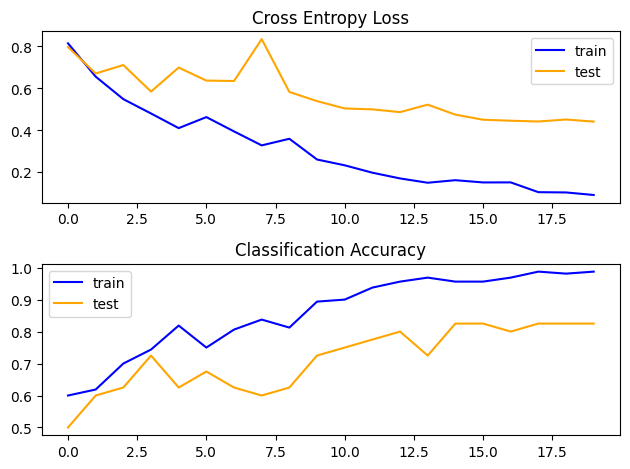

In [18]:
# Define CNN model
def define_model_vgg1():
    model = Sequential(name="VGG1")
    model.add(Input(shape=(200, 200, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Entry point, run the test harness
run_test_harness(define_model_vgg1)


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 72.500


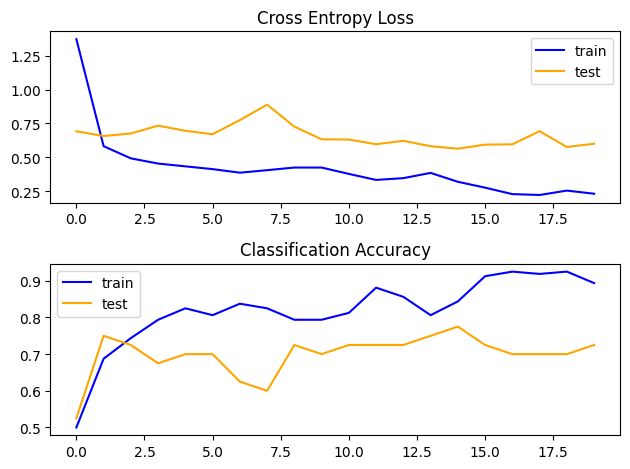

In [19]:
# define cnn model
def define_model_vgg3():
    model = Sequential(name="VGG3")
    model.add(Input(shape=(200, 200, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# entry point, run the test harness
run_test_harness(define_model_vgg3)


In [20]:
# Run the test harness for evaluating the model
def run_test_harness_augmentation(define_model):
    clear_session()
    start_time = time()

    model = define_model()
    log_dir = './logs/' + 'VGG3_Augmentation'
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)

    train_datagen = ImageDataGenerator(rescale=1.0/255.0,
        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    train_it = train_datagen.flow_from_directory('/kaggle/working/dataset_vultures_vs_owls/train/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('/kaggle/working/dataset_vultures_vs_owls/test/',
        class_mode='binary', batch_size=64, target_size=(200, 200))

    history = model.fit(train_it, validation_data=test_it, epochs=20, verbose=0,
                        callbacks=[tensorboard_callback, batch_logging_callback])
    

    training_time = time() - start_time

    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]
    

    log_test_images(model, test_it, log_dir)

    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    

    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": "VGG3_augmentation",  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": acc,
        "Trainable Parameters": trainable_params,
    }

    model.save('./models/VGG3_augmentation.h5')    

    model_performance_df = pd.read_csv("model_performance.csv")


    new_model_results = pd.DataFrame([model_results])


    model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
    model_performance_df.to_csv("model_performance.csv", index=False)
    summarize_diagnostics(history)
    del model, train_it, test_it, train_datagen, test_datagen, tensorboard_callback, batch_logging_callback, history


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 75.000


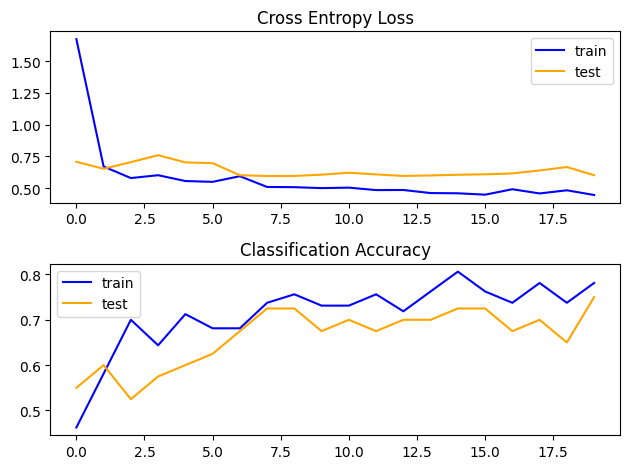

In [21]:
run_test_harness_augmentation(define_model_vgg3)

In [22]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model


# define cnn model
def define_model_vgg16_all():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))

    for layer in model.layers:
        layer.trainable = True
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    model = Model(inputs=model.inputs, outputs=output)
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [23]:
# Run the test harness for evaluating the model
def run_test_harness_vgg16_all_layers(define_model):
    clear_session()
    start_time = time()

    model = define_model()
    log_dir = './logs/' + "VGG16_all_layers"
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)
    datagen = ImageDataGenerator(featurewise_center=True)

    datagen.mean = [123.68, 116.779, 103.939]   
    train_it = datagen.flow_from_directory('/kaggle/working/dataset_vultures_vs_owls/train/',class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/kaggle/working/dataset_vultures_vs_owls/test/',class_mode='binary', batch_size=64, target_size=(224, 224))

    history = model.fit(train_it, validation_data=test_it, epochs=20, verbose=0,callbacks=[tensorboard_callback, batch_logging_callback])


    training_time = time() - start_time

    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]


    log_test_images(model, test_it, log_dir)
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))

    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": "VGG16_all_layers",  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": acc,
        "Trainable Parameters": trainable_params,
    }
    model.save('./models/VGG16_all_layers.h5') 
    model_performance_df = pd.read_csv("model_performance.csv")


    new_model_results = pd.DataFrame([model_results])
    model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
    model_performance_df.to_csv("model_performance.csv", index=False)
    summarize_diagnostics(history)
    del model,train_it, test_it, datagen, tensorboard_callback, batch_logging_callback, history


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 50.000


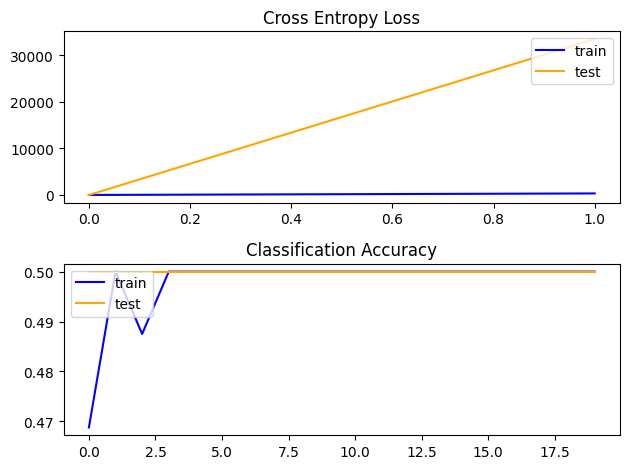

In [24]:
run_test_harness_vgg16_all_layers(define_model_vgg16_all) 

In [28]:
# Run the test harness for evaluating the model
def run_test_harness_vgg16_MLP_layers(define_model):
    clear_session()
    start_time = time()

    model = define_model()
    log_dir = './logs/' + "VGG16_MLP_layers"
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)

    datagen = ImageDataGenerator(featurewise_center=True)

    datagen.mean = [123.68, 116.779, 103.939]    

    train_it = datagen.flow_from_directory('/kaggle/working/dataset_vultures_vs_owls/train/',
                                            class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/kaggle/working/dataset_vultures_vs_owls/test/',
                                            class_mode='binary', batch_size=64, target_size=(224, 224))

    history = model.fit(train_it, validation_data=test_it, epochs=20, verbose=0,
                        callbacks=[tensorboard_callback, batch_logging_callback])


    training_time = time() - start_time

    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]


    log_test_images(model, test_it, log_dir)

    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))

    trainable_params = int(
        tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy()
    )

    model_results = {
        "Model": "VGG16_MLP_layers",  # Get model name from type
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": acc,
        "Trainable Parameters": trainable_params,
    }

    model.save('./models/VGG16_MLP_layers.h5') 

    model_performance_df = pd.read_csv("model_performance.csv")

    new_model_results = pd.DataFrame([model_results])


    model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
    model_performance_df.to_csv("model_performance.csv", index=False)
    summarize_diagnostics(history)
    del model, train_it, test_it, datagen, tensorboard_callback, batch_logging_callback, history


In [29]:
def define_model_vgg16_MLP():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
        layer.trainable = False
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    model = Model(inputs=model.inputs, outputs=output)
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 92.500


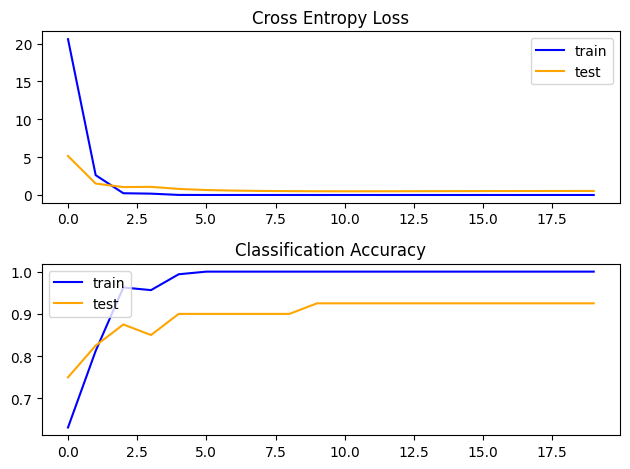

In [30]:
run_test_harness_vgg16_MLP_layers(define_model_vgg16_MLP)

In [31]:
def MLP():
    model = Sequential(name="MLP")
    model.add(Flatten(input_shape=(200, 200, 3)))  # Input shape similar to VGG16
    model.add(Dense(4096, activation='relu'))      # Layer 1
    model.add(Dense(4096, activation='relu'))      # Layer 2
    model.add(Dense(4096, activation='relu'))      # Layer 3
    model.add(Dense(1, activation='sigmoid'))      # Output layer for binary classification
    
    # Compile model with SGD optimizer and binary cross-entropy loss
    opt = SGD(learning_rate=0.001, momentum=0.5)   # Similar to VGG16 optimizer setup
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = MLP()
model.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 120000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │   491,524,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,090,817 (1.96 GB)

 Trainable params: 525,090,817 (1.96 GB)

 Non-trainable params: 0 (0.00 B)

In [32]:
def run_test_harness(define_model):
    clear_session()  # Free resources from previous runs

    start_time = time()
    model = define_model()

    log_dir = './logs/' + model.name
    if os.path.exists(log_dir):
        shutil.rmtree(log_dir)
    os.makedirs(log_dir, exist_ok=True)

    tensorboard_callback = TensorBoard(log_dir=log_dir)
    batch_logging_callback = BatchLoggingCallback(log_dir=log_dir)

    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    train_it = datagen.flow_from_directory(
        '/kaggle/working/dataset_vultures_vs_owls/train/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )
    test_it = datagen.flow_from_directory(
        '/kaggle/working/dataset_vultures_vs_owls/test/',
        class_mode='binary',
        batch_size=64,
        target_size=(200, 200)
    )

    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=20,
        verbose=0,
        callbacks=[tensorboard_callback, batch_logging_callback]
    )

    training_time = time() - start_time
    train_loss = history.history["loss"][-1]
    train_acc = history.history["accuracy"][-1]

    log_test_images(model, test_it, log_dir)

    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))

    trainable_params = int(tf.reduce_sum([tf.size(v) for v in model.trainable_variables]).numpy())

    model_results = {
        "Model": model.name,
        "Training Time (s)": training_time,
        "Training Loss": train_loss,
        "Training Accuracy": train_acc,
        "Testing Accuracy": acc,
        "Trainable Parameters": trainable_params,
    }
    # save model
    model.save(f'./models/{model.name}.h5')    
    # Loading from CSV
    model_performance_df = pd.read_csv("model_performance.csv")

    # Create a DataFrame for the new model results
    new_model_results = pd.DataFrame([model_results])

    # Append the new results to the existing DataFrame
    model_performance_df = pd.concat([model_performance_df, new_model_results], ignore_index=True)
    # Saving to CSV
    model_performance_df.to_csv("model_performance.csv", index=False)
    summarize_diagnostics(history)
    del model, train_it, test_it, datagen, tensorboard_callback, batch_logging_callback, history

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
> 80.000


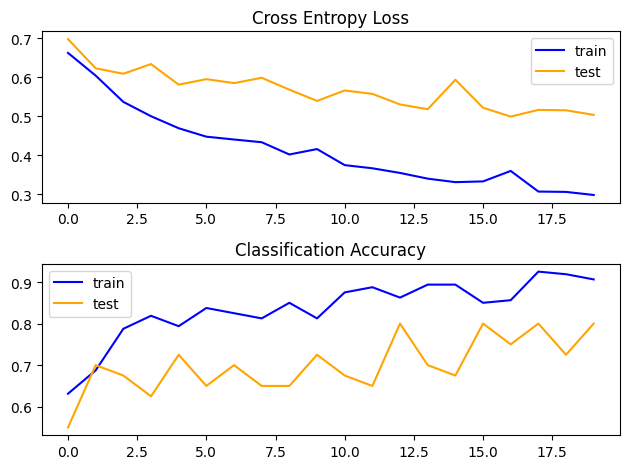

In [33]:
run_test_harness(MLP)

In [36]:
!zip -r logs.zip /kaggle/working/logs

  adding: kaggle/working/logs/ (stored 0%)
  adding: kaggle/working/logs/VGG1/ (stored 0%)
  adding: kaggle/working/logs/VGG1/events.out.tfevents.1731756734.3af1db411d92.30.3.v2 (deflated 0%)
  adding: kaggle/working/logs/VGG1/train/ (stored 0%)
  adding: kaggle/working/logs/VGG1/train/events.out.tfevents.1731756482.3af1db411d92.30.1.v2 (deflated 84%)
  adding: kaggle/working/logs/VGG1/validation/ (stored 0%)
  adding: kaggle/working/logs/VGG1/validation/events.out.tfevents.1731756495.3af1db411d92.30.2.v2 (deflated 77%)
  adding: kaggle/working/logs/VGG1/events.out.tfevents.1731756476.3af1db411d92.30.0.v2 (deflated 80%)
  adding: kaggle/working/logs/VGG3_Augmentation/ (stored 0%)
  adding: kaggle/working/logs/VGG3_Augmentation/events.out.tfevents.1731757063.3af1db411d92.30.8.v2 (deflated 80%)
  adding: kaggle/working/logs/VGG3_Augmentation/events.out.tfevents.1731757409.3af1db411d92.30.11.v2 (deflated 0%)
  adding: kaggle/working/logs/VGG3_Augmentation/train/ (stored 0%)
  adding: kagg

In [40]:
!zip -r models.zip /kaggle/working/models

  adding: kaggle/working/models/ (stored 0%)
  adding: kaggle/working/models/MLP.h5 (deflated 9%)
  adding: kaggle/working/models/VGG3_augmentation.h5 (deflated 11%)
  adding: kaggle/working/models/VGG3.h5 (deflated 13%)
  adding: kaggle/working/models/VGG16_all_layers.h5 (deflated 100%)
  adding: kaggle/working/models/VGG1.h5 (deflated 13%)
  adding: kaggle/working/models/VGG16_MLP_layers.h5 (deflated 8%)


In [66]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np



def load_image(filename, size):
    img = load_img(filename, target_size=(size, size))
    img = img_to_array(img)  # Shape will be (200, 200, 3)
    img = img.astype('float32')  # Convert to float
    img = img - [123.68, 116.779, 103.939]  # Preprocess for VGG
    img = np.expand_dims(img, axis=0)  # Add batch dimension: (1, 200, 200, 3)
    return img


def run_example(saved_model, filename, size):
    img = load_image(filename, size)
    print(f"Processed image shape: {img.shape}")  # Should print (1, 200, 200, 3)
    model = load_model(saved_model)
    result = model.predict(img)
    print(result[0])
    if result[0] > 0.5:
        print("vulture")
    else:
        print("owl") 

In [68]:

run_example('/kaggle/working/models/VGG3.h5', '//kaggle/input/images/Temporary/ClassA_easy.webp', 200)
run_example('/kaggle/working/models/VGG3.h5', '/kaggle/input/images/Temporary/ClassA_hard.webp', 200)
run_example('/kaggle/working/models/VGG3.h5', '/kaggle/input/images/Temporary/ClassB_easy.webp', 200)
run_example('/kaggle/working/models/VGG3.h5', '//kaggle/input/images/Temporary/ClassB_hard.webp', 200)


Processed image shape: (1, 200, 200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[0.]
owl
Processed image shape: (1, 200, 200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[0.]
owl
Processed image shape: (1, 200, 200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[0.]
owl
Processed image shape: (1, 200, 200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[0.]
owl


In [71]:

run_example('/kaggle/working/models/VGG16_MLP_layers.h5', '//kaggle/input/images/Temporary/ClassA_easy.webp', 224)
run_example('/kaggle/working/models/VGG16_MLP_layers.h5', '/kaggle/input/images/Temporary/ClassA_hard.webp', 224)
run_example('/kaggle/working/models/VGG16_MLP_layers.h5', '/kaggle/input/images/Temporary/ClassB_easy.webp', 224)
run_example('/kaggle/working/models/VGG16_MLP_layers.h5', '//kaggle/input/images/Temporary/ClassB_hard.webp', 224)


Processed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
[0.99999785]
vulture
Processed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
[0.9991082]
vulture
Processed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
[8.3188315e-05]
owl
Processed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
[0.00043823]
owl
